In [1]:
### Please ignore the warning messages due to duplicate methods
library(readxl)
library(dplyr)
library(lubridate)
library(ggplot2)
library(tseries)
library(forecast)
library(TTR)
library(zoo)
library(xts)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last



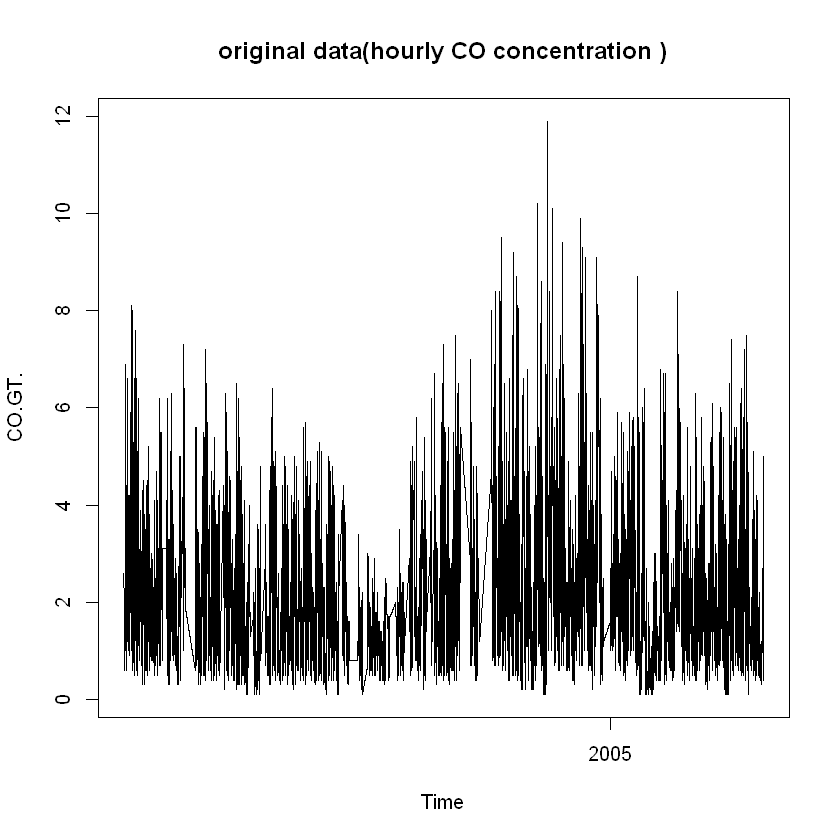

In [2]:
### Read the excel file
airquality<-read_excel("C:\\Users\\poonam\\Downloads\\AirQualityUCI\\AirQualityUCI.xlsx")
#airquality
### add the data to dataframe for manipulation
a<-data.frame(airquality)
#a
### Selecled the few columns(date, time and co) from the data frame 
df_co<-select(a,Date,Time,CO.GT.)
#df_co
testdata <- df_co
### manipulation of time columns( chose hour)
testdata1 <- mutate(testdata, Time = hour(testdata$Time))
testdata2 <- mutate(testdata1, date2 = update(testdata1$Date,hour = testdata1$Time))
#testdata2
cleanedset1 <- select(testdata2, date2, CO.GT.)
cleanedset1$CO.GT.[cleanedset1$CO.GT. == -200] <- NA
z <- zoo(select(cleanedset1,CO.GT.))
x <- na.fill(z, "extend")
b <- data.frame(x)
colnames(b) <- c("hourly averaged concentration CO")
cleanset2=cbind(cleanedset1,b)
cleanset3 = select(cleanset2,date2,'hourly averaged concentration CO')
x3.index <- select(cleanset3,date2)
x3.data <- select(cleanset3,'hourly averaged concentration CO')
x4 <-zoo(x3.data,x3.index$date2)
plot(x4,main="original data(hourly CO concentration )",xlab="Time",ylab="CO.GT.")

In [3]:
## weekly
x5weekly <- apply.weekly(x4,mean)
x5weekly_df <- as.data.frame(x5weekly)
head(x5weekly_df)

,x5weekly
2004-03-14 23:00:00,2.471078
2004-03-21 23:00:00,2.652679
2004-03-28 23:00:00,1.886607
2004-04-04 23:00:00,2.336607
2004-04-11 23:00:00,2.096131
2004-04-18 23:00:00,2.270815


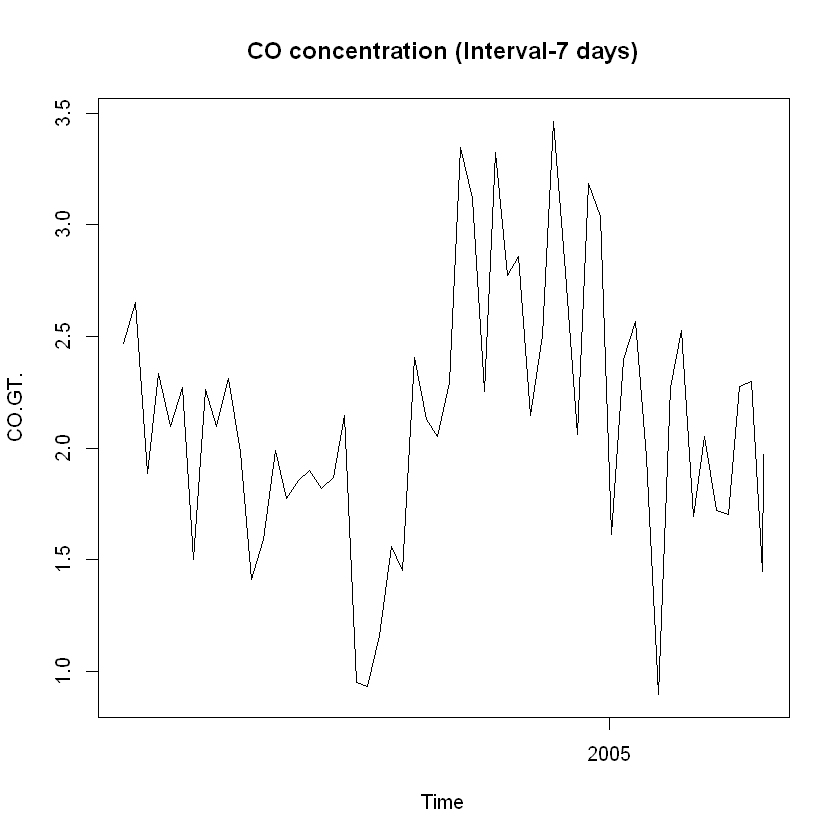

In [4]:
plot(x5weekly,main="CO concentration (Interval-7 days)",xlab="Time",ylab="CO.GT.")


In [5]:
str(x5weekly)


'zoo' series from 2004-03-14 23:00:00 to 2005-04-04 14:00:00
  Data: Named num [1:57] 2.47 2.65 1.89 2.34 2.1 ...
 - attr(*, "names")= chr [1:57] "2004-03-14 23:00:00" "2004-03-21 23:00:00" "2004-03-28 23:00:00" "2004-04-04 23:00:00" ...
  Index:  POSIXct[1:57], format: "2004-03-14 23:00:00" "2004-03-21 23:00:00" "2004-03-28 23:00:00" ...


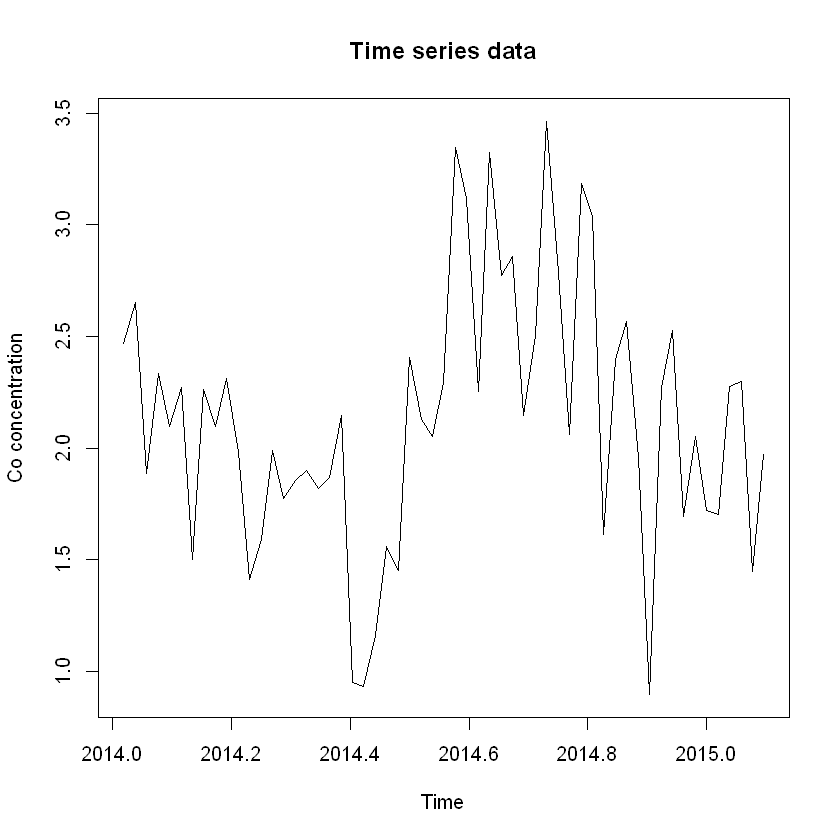

In [6]:
############Convert the data to Time series
colnames(x5weekly_df)<-c("co")
series<-ts(x5weekly_df,frequency=52,start=c(2014,2))
### Plot the time series data
plot(series,main="Time series data",ylab="Co concentration")

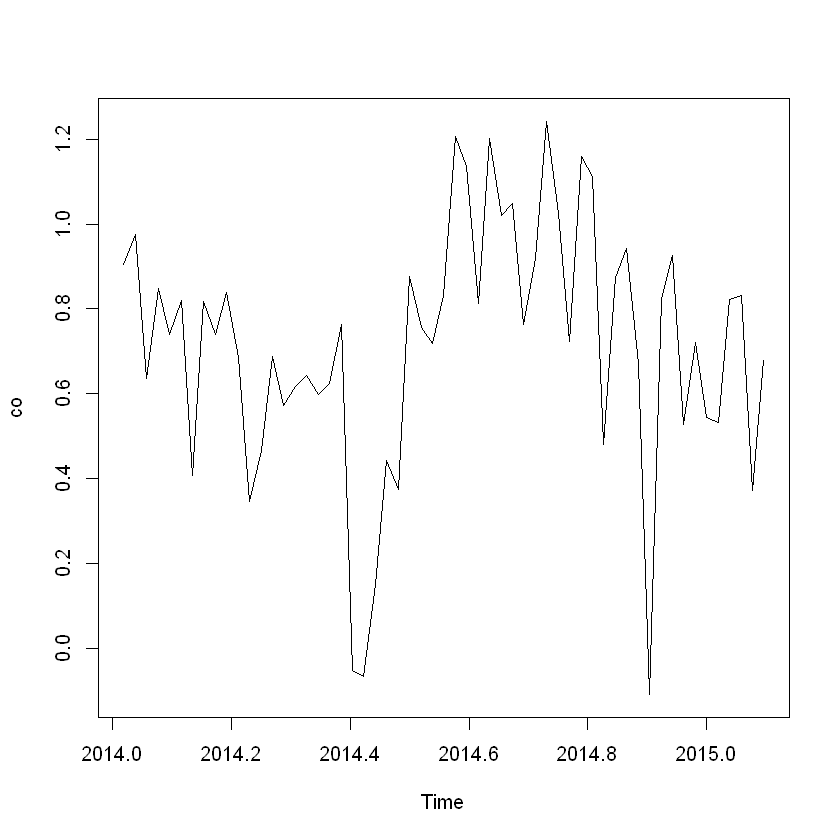

In [7]:
### Make the data stationary(log of data to stabilize non-constant variance)
plot(log(series))

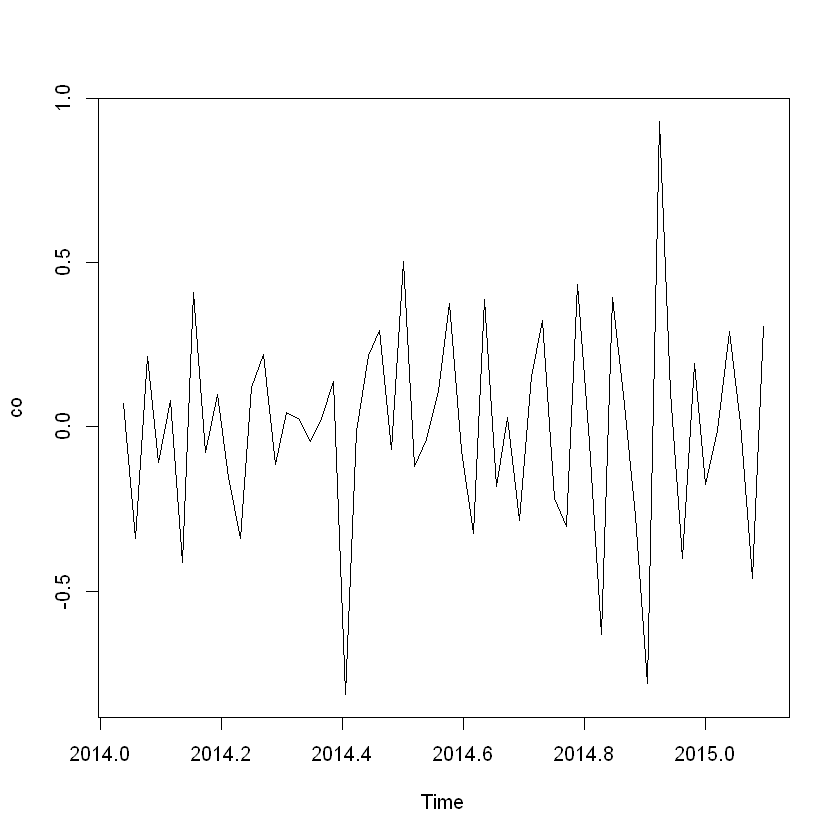

In [8]:
### Make the mean constant
plot(diff(log(series)))

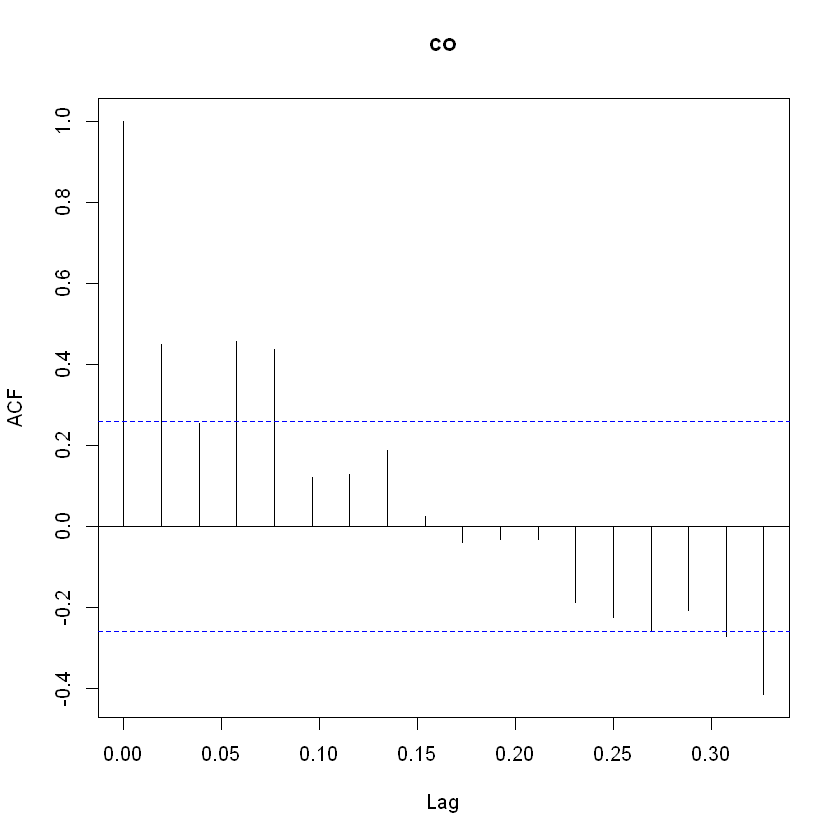

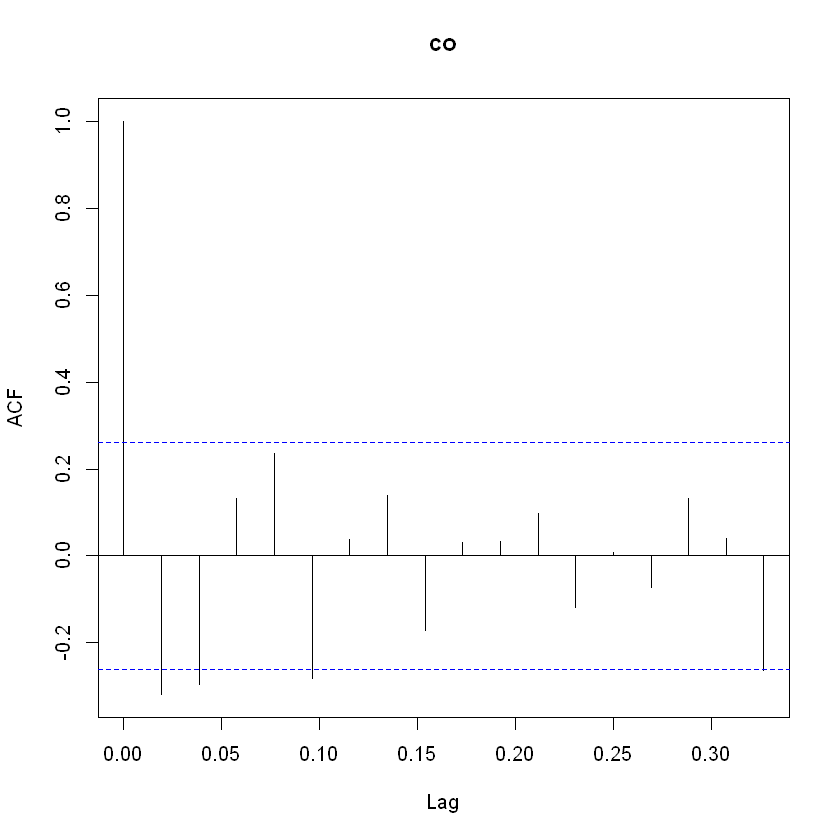

Warning message:
"The chosen seasonal unit root test encountered an error when testing for the first difference.
From stl(): series is not periodic or has less than two periods
0 seasonal differences will be used. Consider using a different unit root test."

Series: series 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.8479  -0.5527  2.1317
s.e.  0.1013   0.1502  0.1830

sigma^2 estimated as 0.2683:  log likelihood=-42.03
AIC=92.06   AICc=92.83   BIC=100.23

Warning message:
"The chosen seasonal unit root test encountered an error when testing for the first difference.
From stl(): series is not periodic or has less than two periods
0 seasonal differences will be used. Consider using a different unit root test."


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2)            with non-zero mean : Inf
 ARIMA(0,0,0)            with non-zero mean : 104.1923
 ARIMA(1,0,0)            with non-zero mean : 93.89396
 ARIMA(0,0,1)            with non-zero mean : 94.31086
 ARIMA(0,0,0)            with zero mean     : 254.0899
 ARIMA(2,0,0)            with non-zero mean : 96.06038
 ARIMA(1,0,1)            with non-zero mean : 92.25375
 ARIMA(2,0,1)            with non-zero mean : Inf
 ARIMA(1,0,2)            with non-zero mean : 94.04152
 ARIMA(0,0,2)            with non-zero mean : 96.05253
 ARIMA(1,0,1)            with zero mean     : Inf

 Now re-fitting the best model(s) without approximations...

 ARIMA(1,0,1)            with non-zero mean : 92.06234

 Best model: ARIMA(1,0,1)            with non-zero mean 



Series: series 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.8479  -0.5527  2.1317
s.e.  0.1013   0.1502  0.1830

sigma^2 estimated as 0.2683:  log likelihood=-42.03
AIC=92.06   AICc=92.83   BIC=100.23

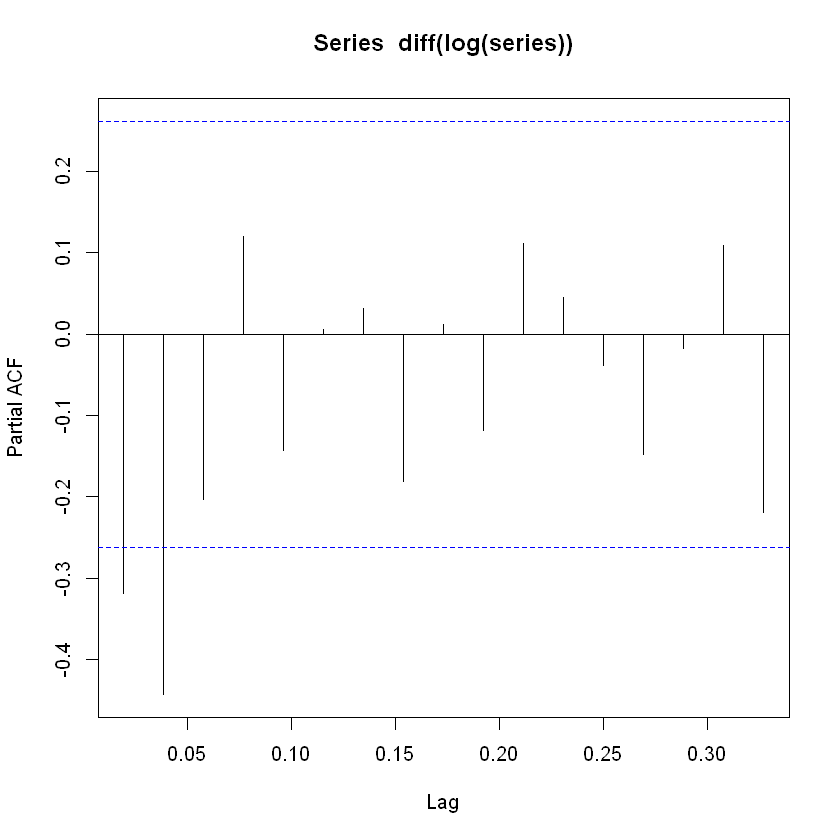

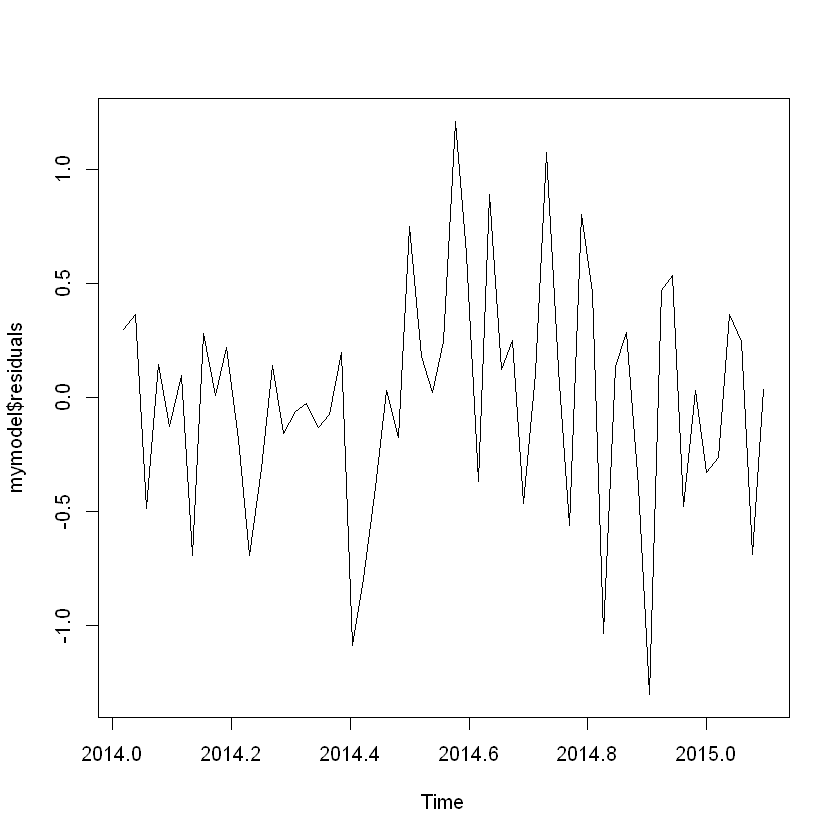

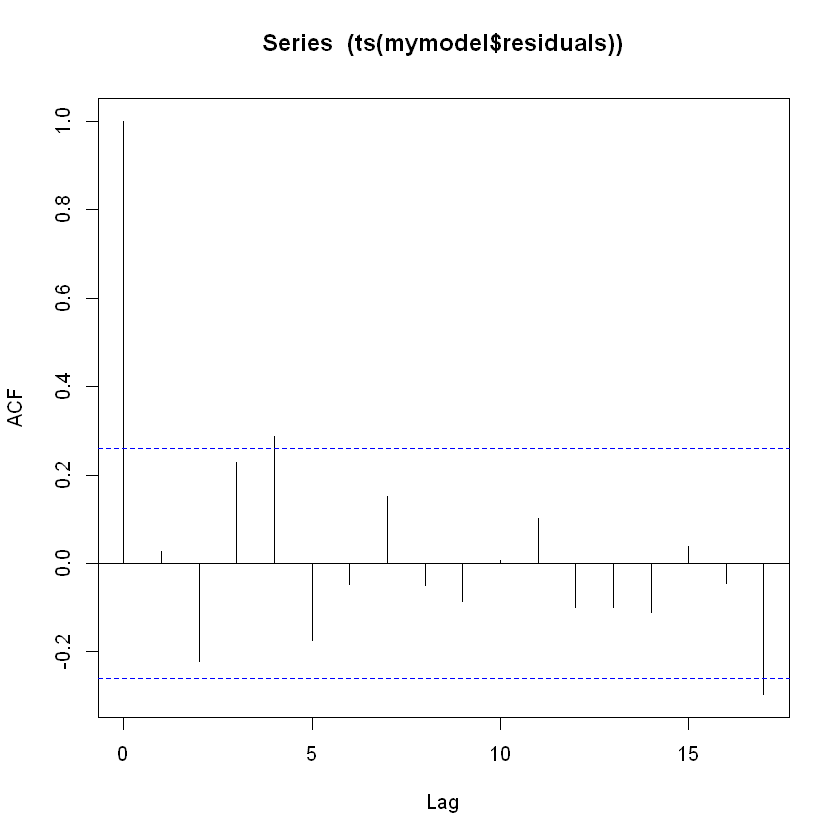

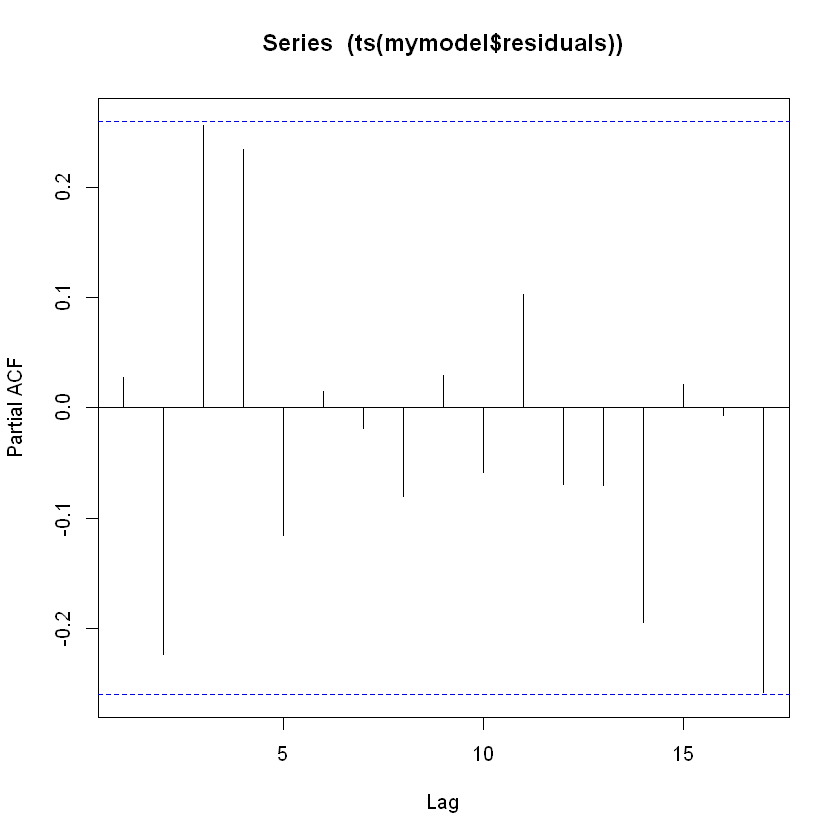

In [9]:
###  ARIMA Model
### Auto correlation factor on non stationary data
acf(series)

### Auto correlation factor on stationary data
###ACF is a plot of total correlation between different lag functions.
acf(diff(log(series)))


### Partial auto correlation factor on stationary data
pacf(diff(log(series)))

### ARIMA model
mymodel<-auto.arima(series)
mymodel

### to see possible combination of p,d,q
auto.arima(series,ic="aic",trace=TRUE)

### plot the model
plot.ts(mymodel$residuals)
acf((ts(mymodel$residuals)))
pacf((ts(mymodel$residuals)))

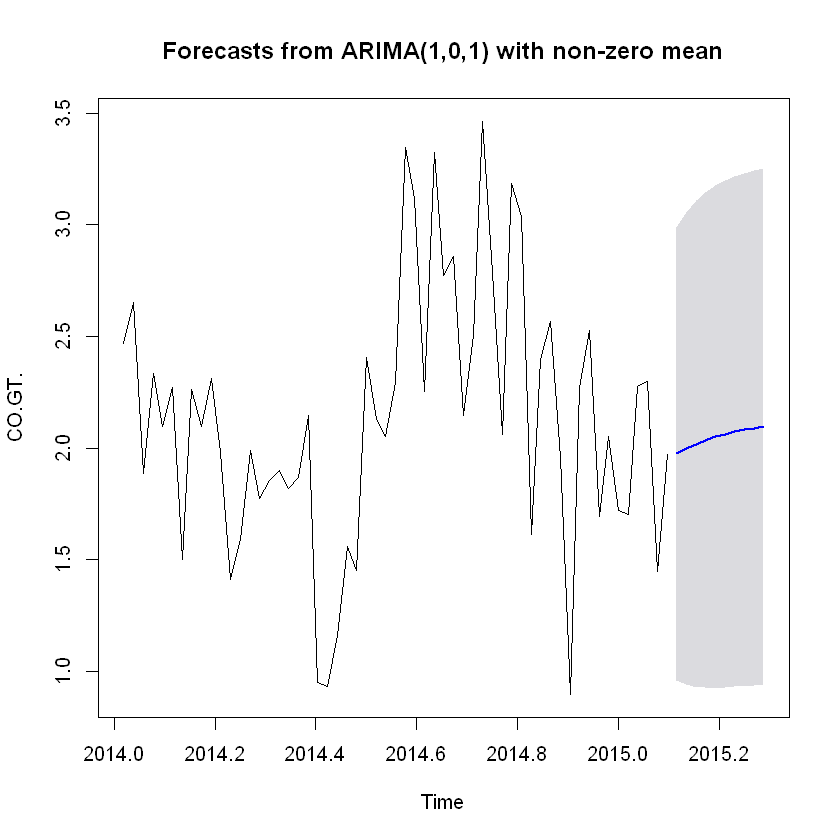

In [10]:
### forcast the model for 60 days
myforecast<-forecast(mymodel,level=c(95),h=10)
plot(myforecast,xlab="Time",ylab="CO.GT.")

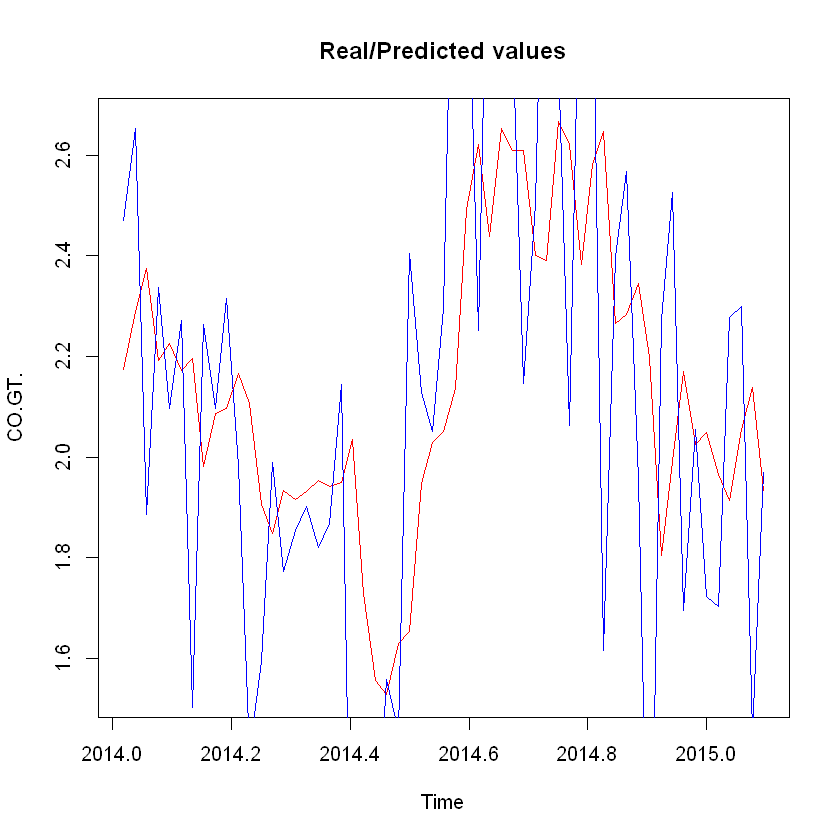

In [11]:
### line plot of real values and predicted values
predict_val=fitted(myforecast)
original_val=series
plot(predict_val,col="red",main="Real/Predicted values",ylab="CO.GT.")
lines(series,col="blue")

In [12]:
############ Accuracy measures of model
accuracy(myforecast)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.009586141,0.5041979,0.3859301,-7.688577,21.45414,0.7512349,0.02736272


In [13]:
################ Correlation between real values and predicted values
res<-cor.test(predict_val,original_val,method="pearson")
res


	Pearson's product-moment correlation

data:  predict_val and original_val
t = 4.3017, df = 55, p-value = 7.003e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2774505 0.6741722
sample estimates:
      cor 
0.5017447 
